## Importacion de librerias

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Exploramos el df

In [122]:
#Leemos el archivo games.csv
df = pd.read_csv("games.csv")

#Exploramos información general del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Preparacion de datos

In [123]:
#Verificamos si hay valores duplicados
datos_duplicados = df.duplicated().sum()
print(datos_duplicados)

0


In [124]:
#Verificamos si hay valores nulos
datos_nulos = df.isna().sum()
print(datos_nulos)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [125]:
#Convertimos las columnas en minuscula
df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


#### Trabajemos los valores de cada columna

En la columna name

In [126]:
#Rellenamos los valores ausentes
df["name"] = df["name"].fillna("nombres_desconocidos")

En la columna year_of_release

In [127]:
#revisamos valores ausentes y convertimos a valor entero
df["year_of_release"] = df["year_of_release"].fillna(0).astype(int)

En la columna genre

In [128]:

#Rellenamos los valores ausentes
df["genre"].fillna("genero_desconocido",inplace=True)

#Visualizamos los valores unicos en genre para verificar el reemplazo
print(df["genre"].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy'
 'genero_desconocido']


/tmp/ipykernel_16088/87935869.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["genre"].fillna("genero_desconocido",inplace=True)


Trabajemos en las columnas critic_score, user_score y rating

In [129]:
#Rellenamos los valores ausentes en la columna critic_score
df["critic_score"].replace(0, np.nan, inplace=True)

/tmp/ipykernel_16088/47039780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["critic_score"].replace(0, np.nan, inplace=True)


In [130]:

#Rellenamos los valores ausentes en la columna user_score
df["user_score"].replace("tbd",np.nan,inplace=True)

#Visualizamos valores unicos en la columna user_score
print(df["user_score"].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


/tmp/ipykernel_16088/1485019928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["user_score"].replace("tbd",np.nan,inplace=True)


In [131]:
#convertimos los valores de la columna "user_score" a flotantes
df["user_score"] = df["user_score"].astype("float")

In [132]:
#Visualizamos valores unicos en la columna rating
print(df["rating"].unique())

#Reemplazamos valores ausentes NaN en la colimna rating
df["rating"].fillna("rating_desconocido",inplace=True)

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


/tmp/ipykernel_16088/4232523195.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating"].fillna("rating_desconocido",inplace=True)


Imprimimos la informacion general del df para confirmar los cambios correctos

In [133]:
df.info()
datos_nulos = df.isna().sum()
print()
print(datos_nulos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score    

## Análisis de datos

 ### Juegos lanzados por años

In [134]:
#agrupamos los juegos lanzados por año
juegos_lanzados_por_año = df.groupby("year_of_release")["name"].count().reset_index()

#Renombramos las columnas necesarias
juegos_lanzados_por_año.rename(columns={'name': 'numero_juegos_por_año',"year_of_release":"año_lanzamiento"}, inplace=True)

#Eliminamos los juegos que no tienen informacion de lanzamiento.
juegos_lanzados_por_año.query("año_lanzamiento !=0",inplace=True)

print(juegos_lanzados_por_año)

    año_lanzamiento  numero_juegos_por_año
1              1980                      9
2              1981                     46
3              1982                     36
4              1983                     17
5              1984                     14
6              1985                     14
7              1986                     21
8              1987                     16
9              1988                     15
10             1989                     17
11             1990                     16
12             1991                     41
13             1992                     43
14             1993                     62
15             1994                    121
16             1995                    219
17             1996                    263
18             1997                    289
19             1998                    379
20             1999                    338
21             2000                    350
22             2001                    482
23         

### Ventas por plataforma

In [135]:
#Creamos una columna con las ventas totales
df["total_sales"] = df[["na_sales","eu_sales","jp_sales" ,"other_sales"]].sum(axis=1)

#agrupamos los juegos lanzados por plataforma y sumamos sus ventas
ventas_por_plataforma = df.groupby("platform")["total_sales"].sum().reset_index()

#Ordenamos de mayor a menor
ventas_por_plataforma = ventas_por_plataforma.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

#imprimimos las primeras 5 filas top
print(ventas_por_plataforma.head(5))

  platform  total_sales
0      PS2      1255.77
1     X360       971.42
2      PS3       939.65
3      Wii       907.51
4       DS       806.12


Graficamos las 5 plataformas con mas ventas


In [136]:
#creamos un df que contenga el año de lanzamiento, la plataforma y el total de ventas
ventas_por_plataforma_año = df.groupby(["platform","year_of_release"])["total_sales"].sum().reset_index()

#Eliminamos las fila que contengan valor 0 en el año
ventas_por_plataforma_año = ventas_por_plataforma_año.query('year_of_release != 0')


#### plataforma PS2

In [137]:
#filtramos solo aquellas filas que tengan ps2
ventas_año_ps2 = ventas_por_plataforma_año[ventas_por_plataforma_año["platform"] == "PS2"]
print(ventas_año_ps2)


    platform  year_of_release  total_sales
140      PS2             2000        39.17
141      PS2             2001       166.43
142      PS2             2002       205.38
143      PS2             2003       184.31
144      PS2             2004       211.81
145      PS2             2005       160.66
146      PS2             2006       103.42
147      PS2             2007        75.99
148      PS2             2008        53.90
149      PS2             2009        26.40
150      PS2             2010         5.64
151      PS2             2011         0.45


Text(0, 0.5, 'Ventas totales')

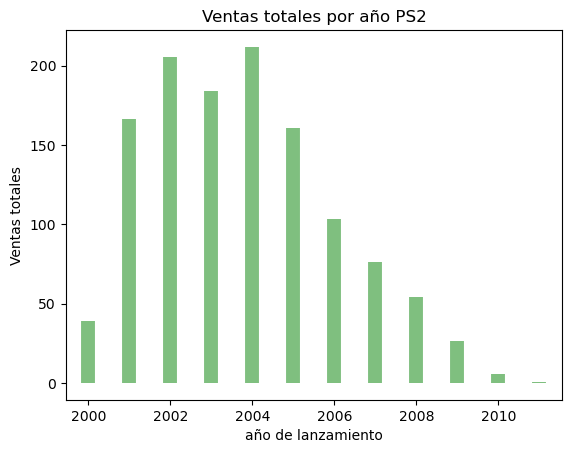

In [138]:
plt.vlines(x=ventas_año_ps2.year_of_release,ymin=0,ymax=ventas_año_ps2.total_sales,alpha=0.5 , linewidth=10, color="green")
plt.title("Ventas totales por año PS2")
plt.xlabel("año de lanzamiento")

plt.ylabel("Ventas totales")

#### plataforma x360

In [143]:
#filtramos solo aquellas filas que tengan X360
ventas_año_x360 = ventas_por_plataforma_año[ventas_por_plataforma_año["platform"] == "X360"]
print(ventas_año_x360)

    platform  year_of_release  total_sales
228     X360             2005         8.25
229     X360             2006        51.62
230     X360             2007        95.41
231     X360             2008       135.26
232     X360             2009       120.29
233     X360             2010       170.03
234     X360             2011       143.84
235     X360             2012        99.74
236     X360             2013        88.58
237     X360             2014        34.74
238     X360             2015        11.96
239     X360             2016         1.52


Text(0, 0.5, 'Ventas totales')

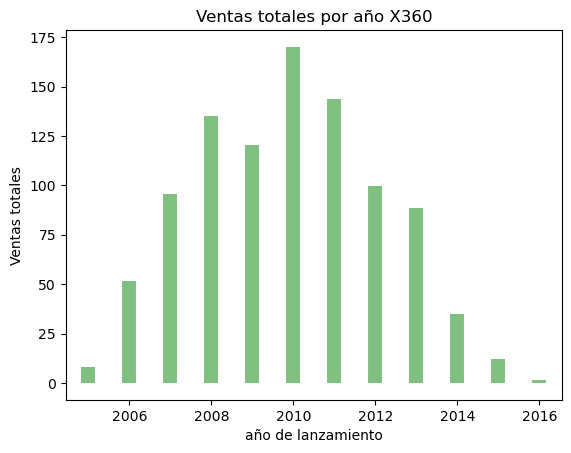

In [144]:
plt.vlines(x=ventas_año_x360.year_of_release,ymin=0,ymax=ventas_año_x360.total_sales,alpha=0.5 , linewidth=10, color="green")
plt.title("Ventas totales por año X360")
plt.xlabel("año de lanzamiento")
plt.ylabel("Ventas totales")

#### plataforma PS3

In [146]:
#filtramos solo aquellas filas que tengan PS3
ventas_año_PS3 = ventas_por_plataforma_año[ventas_por_plataforma_año["platform"] == "PS3"]
print(ventas_año_PS3)

    platform  year_of_release  total_sales
153      PS3             2006        20.96
154      PS3             2007        73.19
155      PS3             2008       118.52
156      PS3             2009       130.93
157      PS3             2010       142.17
158      PS3             2011       156.78
159      PS3             2012       107.36
160      PS3             2013       113.25
161      PS3             2014        47.76
162      PS3             2015        16.82
163      PS3             2016         3.60


Text(0, 0.5, 'Ventas totales')

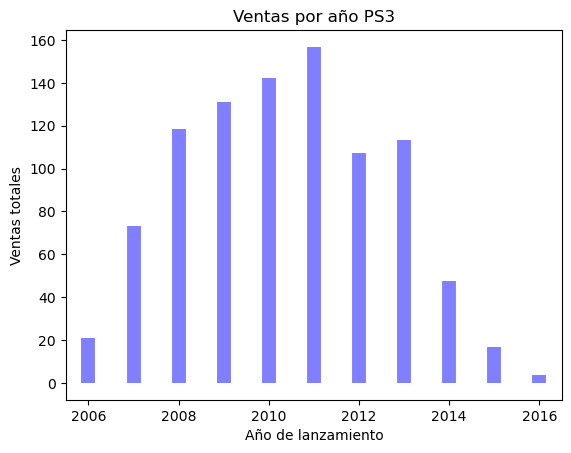

In [158]:
plt.vlines(x=ventas_año_PS3.year_of_release,ymin=0,ymax=ventas_año_PS3.total_sales,alpha=0.5,linewidth=10, colors="blue")
plt.title("Ventas por año PS3")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales")

#### Plataforma Wii

In [159]:
#filtramos solo aquellas filas que tengan Wii
ventas_año_Wii = ventas_por_plataforma_año[ventas_por_plataforma_año["platform"] == "Wii"]
print(ventas_año_Wii)

    platform  year_of_release  total_sales
211      Wii             2006       137.15
212      Wii             2007       152.77
213      Wii             2008       171.32
214      Wii             2009       206.97
215      Wii             2010       127.95
216      Wii             2011        59.65
217      Wii             2012        21.71
218      Wii             2013         8.59
219      Wii             2014         3.75
220      Wii             2015         1.14
221      Wii             2016         0.18


Text(0, 0.5, 'Ventas totales')

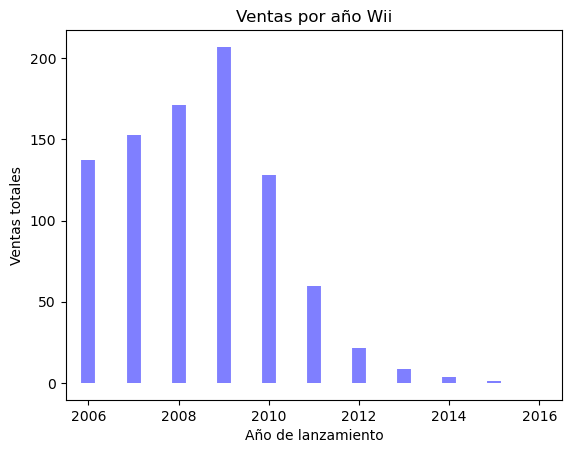

In [160]:
plt.vlines(x=ventas_año_Wii.year_of_release,ymin=0,ymax=ventas_año_Wii.total_sales,alpha=0.5,linewidth=10, colors="blue")
plt.title("Ventas por año Wii")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales")

#### Plataforma DS

In [161]:
#filtramos solo aquellas filas que tengan DS
ventas_año_DS = ventas_por_plataforma_año[ventas_por_plataforma_año["platform"] == "DS"]
print(ventas_año_DS)

   platform  year_of_release  total_sales
28       DS             1985         0.02
29       DS             2004        17.27
30       DS             2005       130.14
31       DS             2006       119.81
32       DS             2007       146.94
33       DS             2008       145.31
34       DS             2009       119.54
35       DS             2010        85.02
36       DS             2011        26.18
37       DS             2012        11.01
38       DS             2013         1.54


Text(0, 0.5, 'Ventas totales')

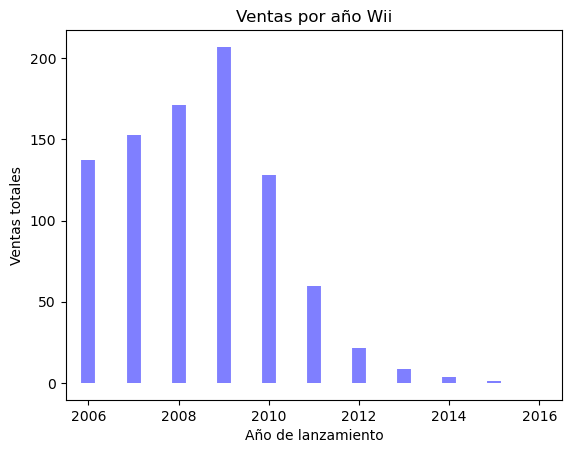

In [162]:
plt.vlines(x=ventas_año_Wii.year_of_release,ymin=0,ymax=ventas_año_Wii.total_sales,alpha=0.5,linewidth=10, colors="blue")
plt.title("Ventas por año Wii")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales")